<a href="https://colab.research.google.com/github/scudilio/CursoDDS/blob/main/M%C3%B3dulo_4_Aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Medical Cost Data**

## Importação dos dados

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Custos%20M%C3%A9dicos/insurance.csv'
dados = pd.read_csv(url)

In [ ]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dados.describe() #Descrição de todas as variaveis numericas do dataset

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
dados.shape

(1338, 7)

## EDA Básica

In [ ]:
!pip install sweetviz # instalando biblioteca de visualização

In [ ]:
import sweetviz #importando biblioteca

In [ ]:
eda = sweetviz.analyze([dados, "Seguro Saúde"], target_feat = "charges")
eda.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
eda.show_notebook()

In [ ]:
eda2 = sweetviz.compare_intra(source_df = dados,
                        condition_series = dados['sex']=='male',
                        names = ['Mascuino','Femino'],
                        target_feat = 'smoker')

                                             |          | [  0%]   00:00 -> (? left)

## Algum pré-processamento interessante antes de prosseguir: 

- Transformar a variável smoker em 0 (não) ou 1 (sim)
- Colocar a variável resposta na escala para cada mil dolares
- Transformação de escala /1000 dolares

In [ ]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 

**Variáveis que vamos considerar na análise, nesse primeiro momento: charges, bmi, smoker.**

In [ ]:
dados = dados[['bmi', 'smoker', 'charges','sex']]
dados.head()

,bmi,smoker,charges,sex
0,27.900,1,16.884924,female
1,33.770,0,1.725552,male
2,33.000,0,4.449462,male
3,22.705,0,21.984471,male
4,28.880,0,3.866855,male


In [ ]:
dados['sex'] = dados['sex'].map({'male': 1, 'female': 0})
dados.head()

,bmi,smoker,charges,sex
0,27.900,1,16.884924,0
1,33.770,0,1.725552,1
2,33.000,0,4.449462,1
3,22.705,0,21.984471,1
4,28.880,0,3.866855,1


## Gráficos pertinentes

In [ ]:
import seaborn as sns

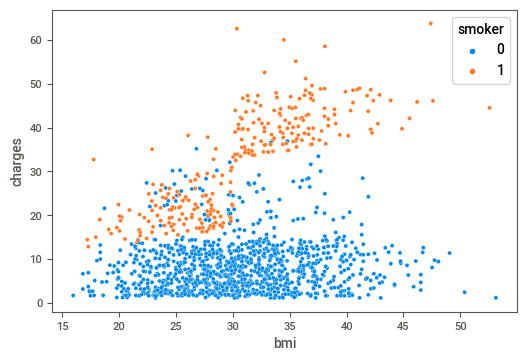

In [ ]:
# Primeiro grafico teremos como validar a regressão linear de boa visão?
sns.scatterplot(x = 'bmi', y = 'charges', data = dados);
# Segundo grafico, conseguimos separar os custos dos dados
sns.scatterplot(x = 'bmi', y = 'charges', hue ='smoker', data = dados);

## Cenário 1: considerando apenas a variável **bmi**.

In [ ]:
X = dados['bmi'].values.reshape(-1, 1)
y = dados['charges'] 

Preparação para a validação do tipo Holdout

In [ ]:
# Holdout
# Separando em dados teste e treinamento 
from sklearn.model_selection import train_test_split 
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.26)

In [ ]:
print(Xtreino.shape)
print(Xteste.shape)

(990, 1)
(348, 1)


In [ ]:
# Ajuste do modelo de regressão linear
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(Xtreino, ytreino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
yteste

In [ ]:
# Predição utilizando a amostra teste
preditos = reg.predict(Xteste)
preditos

In [ ]:
import numpy as np
np.mean((preditos - yteste)**2)

124.06164034712975

In [ ]:
# Erro Quadrático Médio
from sklearn.metrics import mean_squared_error 
eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 124.06


In [ ]:
# Coeficientes
b0 = reg.intercept_
b1 = reg.coef_
print('Intercepto: \n', b0)
print('Coeficientes: \n', b1)

Intercepto: 
 1.270646096685999
Coeficientes: 
 [0.39049414]


Nesse cenário, o modelo de regressão linear é dado por

 **CUSTOS = b0 + b1 * IMC**

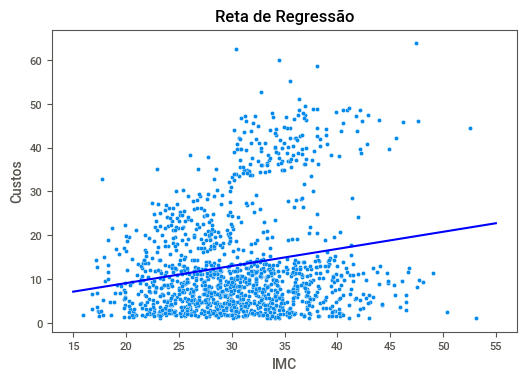

In [ ]:
import numpy as np

x = np.arange(15, 55, 0.01)
y0 = b0 + b1*x

import matplotlib.pyplot as plt

sns.scatterplot(x = 'bmi', y = 'charges', data = dados);
plt.plot(x, y0, color = 'blue')
plt.title('Reta de Regressão')
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

Note agora o que aconteceria se ajustassemos e avaliassemos o modelo no mesmo conjunto de dados (nesse caso, os dados todos).

In [ ]:
reg0 = LinearRegression()
reg0.fit(X, y)

preditos = reg0.predict(X)

eqm = mean_squared_error(y, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 140.78


---

## Cenário 2: considerando a variável **bmi** e **smoker**.

In [ ]:
X = dados[['bmi', 'smoker']]
y = dados['charges'] 

In [ ]:
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

reg = LinearRegression()
reg.fit(Xtreino, ytreino)

preditos = reg.predict(Xteste)

eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 48.55


In [ ]:
# Coeficientes
b0 = reg.intercept_
b1, b2 = reg.coef_
print('Intercepto: \n',reg.intercept_)
print('Coeficientes: \n', reg.coef_)

Intercepto: 
 -3.7577094497897576
Coeficientes: 
 [ 0.39178516 24.4637071 ]


In [ ]:
import numpy as np

x = np.arange(15, 55, 0.01)
y0 = b0 + b1*x + b2*0
y1 = b0 + b1*x + b2*1

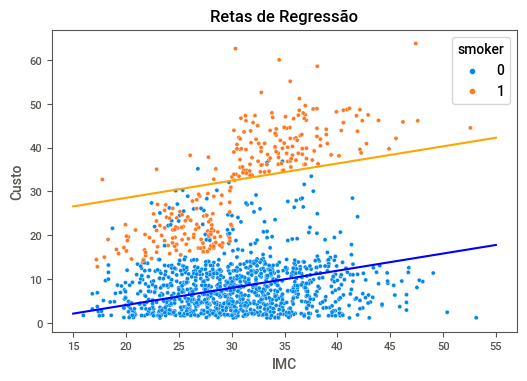

In [ ]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados)
plt.plot(x, y0, color = 'blue')
plt.plot(x, y1, color = 'orange')
plt.title('Retas de Regressão')
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.show()

---

## **Exercício**

Faça repetições da técnica Holdout, variando a distribuição de quem vai para amostra de teste e treinamento. Guarde os resultados do EQM para cada repetição e, no final, calcule sua média para obter uma valor mais estável para o EQM.

In [106]:
X2 = dados[['bmi', 'smoker']]
y2 = dados['charges'] 

In [108]:
from sklearn.model_selection import train_test_split 
Xtreino, Xteste, ytreino, yteste  = train_test_split(X2, y2, test_size = 0.25)


# Ajuste do modelo de regressão linear
from sklearn.linear_model import LinearRegression
#ajuste na amostra treino
reg = LinearRegression()
reg.fit(Xtreino, ytreino)


#predição amostra teste
preditos = reg.predict(Xteste)

In [109]:
# Erro Quadrático Médio
from sklearn.metrics import mean_squared_error
eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

# Coeficientes
b0 = reg.intercept_
b1, b2 = reg.coef_
print('Intercepto: \n',reg.intercept_)
print('Coeficientes: \n', reg.coef_)

EQM : 59.23
Intercepto: 
 -3.940603145050982
Coeficientes: 
 [ 0.40089682 23.58662019]


In [113]:
# Resolução
import numpy as np
R = 100
eqms = []

for i in range(R):
    Xtreino, Xteste, ytreino, yteste  = train_test_split(X2, y2, test_size = 0.25)
    reg = LinearRegression()
    reg.fit(Xtreino, ytreino)
    preditos = reg.predict(Xteste)
    eqm = mean_squared_error(yteste, preditos)
    eqms.append(eqm)

In [114]:
def HoldoutRep(modelo = LinearRegression(), replicas = 100, proporcao = 0.25):
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split 

    eqms_treino = []
    eqms_teste = []

    for i in range(replicas):
        Xtreino , Xteste, ytreino, yteste  = train_test_split(X2, y2, test_size = proporcao)
        
        #Treinando o Modelo
        reg = modelo
        reg.fit(Xtreino, ytreino)

        #Verificando o eqm no teste
        preditos_treino = reg.predict(Xtreino)
        eqm_treino = mean_squared_error(ytreino, preditos_treino)

        preditos_teste = reg.predict(Xteste)
        eqm_teste = mean_squared_error(yteste, preditos_teste)

        #Guardando o resultado
        eqms_treino.append(eqm_treino)
        eqms_teste.append(eqm_teste)
    
    res_treino = np.array(eqms_treino).mean().round(2)
    res_teste = np.array(eqms_teste).mean().round(2)

    print('EQM médio de TREINO: {}'.format(res_treino))
    print('EQM médio de TESTE: {}'.format(res_teste))

    return res_treino, res_teste 

In [115]:
HoldoutRep(replicas = 1000)

EQM médio de TREINO: 50.09
EQM médio de TESTE: 50.42


(50.09, 50.42)